In [1]:
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Разработка_идентичности_бренда_женского_нижнего_белья.csv')

In [3]:
df

,Отметка времени,Укажите свой возраст:,Укажите ваш семейный статус:,Укажите ваше место проживания:,Укажите вашу деятельность:,Укажите уровень вашего среднемесячного дохода:,"Я предпочитаю бренды белья, которые транслируют следующие ценности:",Для ежедневной носки я отдаю предпочтение:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Бренд нижнего белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Экологичность бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие базового белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие сексуального белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие и базового, и сексуального белья в одном бренде]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нескольких цветов одной модели]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Качество материалов]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие гендерно-нейтрального белья в ассортименте]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие индивидуального пошива белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нестандартной размерной сетки]",Кружевное сексуальное белье должно стоить дороже базового:,"Чаще всего я покупаю белье, которое стоит:","Я готова заплатить больше, если белье:",Чаще всего я покупаю белье:,"Совершая онлайн-покупку белья, я предпочитаю оформлять заказ:","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Визуальная составляющая в социальных сетях бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие бодипозитивных кампаний у бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие программы лояльности]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Отношение лидеров мнений к бренду]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Партнерство с брендами из других сфер]","А если вы хотите поучаствовать в интервью и рассказать подробнее о том, как вы выбираете нижнее белье - оставьте любые контакты ниже:"
0,2023/05/15 11:31:36 AM GMT+3,25-34 года,Не в отношениях/не замужем,Москва и МО,Я работаю,более 100 тыс. руб,"Красота, эстетика, сексуальность, близость, лю...",Базовому белью без кружева и косточек,3,1,2,5,5,5,4,1,1,1,Да,Более 10 тыс. руб,"Произведено моим любимым брендом, несмотря на ...",Оффлайн,На личном сайте бренда,5,1,2,3,2,Виктория
1,2023/05/15 1:32:58 PM GMT+3,18-24 года,В отношениях,Москва и МО,Я учусь в ВУЗе,50-100 тыс. руб,"Принятие себя, эмпатия, гуманность, простота, ...",Базовому белью без кружева и косточек,3,3,4,1,3,4,5,1,1,1,Нет,Менее 5 тыс. руб,Точно мне подойдёт и я точно буду его носить,Оффлайн,На личном сайте бренда,3,3,3,4,3,NaN
2,2023/05/15 1:34:57 PM GMT+3,18-24 года,Не в отношениях/не замужем,Москва и МО,Я работаю,50-100 тыс. руб,"Красота, эстетика, сексуальность, близость, лю...",Баз

In [4]:
age_groups = ['18-24 года', '25-34 года',  '35-44 года', 'более 45 лет']

# Блок 1

## Н1. В сфере женского нижнего белья пользователи независимо от возраста отдают предпочтение архетипу Любовника (первый ассоциативный ряд)

Так как у нас представлено 12 архетипов, преоладание какого -то одного означает, что доля "p" для генеральной совокупности будет больше 1/12 , проверим это с помощью биномиального теста.

In [5]:
df1 = df[['Укажите свой возраст:', 'Я предпочитаю бренды белья, которые транслируют следующие ценности:']]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data['Я предпочитаю бренды белья, которые транслируют следующие ценности:'].apply(lambda row: 'Красота, эстетика, сексуальность, близость, любовь' in row)).sum()
    print(f'Выборочная доля женщин, отдающих предпочтение архетипу Любовника: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/12, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/12')
    print(f'H1: в возрастной группе {age} p>1/12\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ преобладает архетип любовника')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} преобладает архетип любовника')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, отдающих предпочтение архетипу Любовника: 63.64%

H0: в возрастной группе 18-24 года p ≤ 1/12
H1: в возрастной группе 18-24 года p>1/12

p-value = 1.6661673980945186e-70

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года преобладает архетип любовника
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, отдающих предпочтение архетипу Любовника: 41.61%

H0: в возрастной группе 25-34 года p ≤ 1/12
H1: в возрастной группе 25-34 года p>1/12

p-value = 4.171245528859919e-28

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года преобладает архетип любовника
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочная доля женщин, отдающих предпочтение архетипу Любовника: 28.07%

H0: в возрастной гр

# Блок 2

Фактор будем считать важным, если за него поставлено больше 2 баллов. И далее будем проводить биномиальный тест, где альтернативная гипотеза о том, что генеральная доля женщин, для которых это важно составляет более половины.

## Н1. Женщины независимо от возраста отдают предпочтение базовому белью для ежедневной носки

In [6]:
df1 = df[['Укажите свой возраст:', 'Для ежедневной носки я отдаю предпочтение:']]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data['Для ежедневной носки я отдаю предпочтение:'].apply(lambda row: 'Базовому белью без кружева и косточек' in row)).sum()
    print(f'Выборочная доля женщин, отдающих предпочтение базовому белью: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ отдают предпочтения базовому белью')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} отдают предпочтения базовому белью')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, отдающих предпочтение базовому белью: 74.55%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 1.0196359007086637e-10

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года отдают предпочтения базовому белью
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, отдающих предпочтение базовому белью: 56.38%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.07002770370307417

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ отдают предпочтения базовому белью
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочная доля женщин, отдающих предпочтение базовому белью: 57.89%

H0: в возрастной груп

## Н2. Женщинам 18-24 лет важно наличие гендерно-нейтрального белья в ассортименте

In [7]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие гендерно-нейтрального белья в ассортименте]'
df1 = df[['Укажите свой возраст:', factor]]
age = '18-24 года'
data = df1[df1['Укажите свой возраст:'] == age]
print(f'Возрастная группа: {age}')
n = len(data)
print(f'Численность возрастной группы: {n}')
m = (data[factor].apply(lambda row: row>2)).sum()
print(f'Выборочная доля женщин, которым важно наличие гендерно-нейтрального белья в ассортименте: {round(m/n*100, 2)}%\n')
p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
print(f'H0: в возрастной группе {age} p ≤ 1/2')
print(f'H1: в возрастной группе {age} p>1/2\n')
print(f'p-value = {p}\n')
if p>0.05:
    print(f'p-value>0.05, не отвергаем H0')
    print(f'в возрастной группе {age} НЕ важно наличие гендерно-нейтрального белья в ассортименте')
else:
    print(f'p-value<0.05, отвергаем H0')
    print(f'в возрастной группе {age} важно наличие гендерно-нейтрального белья в ассортименте')
print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно наличие гендерно-нейтрального белья в ассортименте: 26.06%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9999999998980365

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важно наличие гендерно-нейтрального белья в ассортименте
-------------------------------------------------------------------------


## Н3. Женщинам 18-24 лет важна экологичность бренда

In [8]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Экологичность бренда]'
df1 = df[['Укажите свой возраст:', factor]]
age = '18-24 года'
data = df1[df1['Укажите свой возраст:'] == age]
print(f'Возрастная группа: {age}')
n = len(data)
print(f'Численность возрастной группы: {n}')
m = (data[factor].apply(lambda row: row>2)).sum()
print(f'Выборочная доля женщин, которым важна экологичность бренда: {round(m/n*100, 2)}%\n')
p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
print(f'H0: в возрастной группе {age} p ≤ 1/2')
print(f'H1: в возрастной группе {age} p>1/2\n')
print(f'p-value = {p}\n')
if p>0.05:
    print(f'p-value>0.05, не отвергаем H0')
    print(f'в возрастной группе {age} НЕ важна экологичность бренда')
else:
    print(f'p-value<0.05, отвергаем H0')
    print(f'в возрастной группе {age} важна экологичность бренда')
print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важна экологичность бренда: 36.36%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9998427795017257

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важна экологичность бренда
-------------------------------------------------------------------------


## Н4. Женщинам независимо от возраста важно наличие нескольких базовых цветов в каждой модели

In [9]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нескольких цветов одной модели]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, кому важно наличие нескольких базовых цветов в каждой модели: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ важно наличие нескольких базовых цветов в каждой модели')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} важно наличие нескольких базовых цветов в каждой модели')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, кому важно наличие нескольких базовых цветов в каждой модели: 80.0%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 1.582272959446162e-15

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года важно наличие нескольких базовых цветов в каждой модели
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, кому важно наличие нескольких базовых цветов в каждой модели: 73.15%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 7.04675130924511e-09

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года важно наличие нескольких базовых цветов в каждой модели
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочн

## Н5. Женщинам независимо от возраста важен бренд нижнего белья

In [10]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Бренд нижнего белья]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, кому важен бренд нижнего белья: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ важен бренд нижнего белья')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} важен бренд нижнего белья')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, кому важен бренд нижнего белья: 49.09%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.6221970623408297

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важен бренд нижнего белья
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, кому важен бренд нижнего белья: 63.76%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.0004916666318224604

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года важен бренд нижнего белья
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочная доля женщин, кому важен бренд нижнего белья: 54.39%

H0: в возрастной группе 35-44 года p ≤ 1/2
H1: в возрастной

## Н6. Женщины независимо от возраста предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья 

In [11]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие и базового, и сексуального белья в одном бренде]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, которые предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которые предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья: 70.3%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 9.536087947563853e-08

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которые предпочитают приобретать белье брендов, в которых представлена как базовая, так и сексуальная линейки белья: 69.13%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 1.725537212632824e-06

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года предпочитают приобретать белье брендов,

# Блок 3. Предпочтения по цене

## Н1. Женщины независимо от возраста готовы заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине

In [12]:
factor = 'Я готова заплатить больше, если белье:'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'Произведено моим любимым брендом, несмотря на наличие похожей модели в другом магазине' in row)).sum()
    print(f'Выборочная доля женщин, кто готов заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ готовы заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} готовы заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, кто готов заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине: 38.79%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9985114874457728

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ готовы заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, кто готов заплатить больше за белье бренда, который им нравится, при наличии схожей модели в другом магазине: 38.26%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.998472763257526

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ готовы заплатить больше за белье бренда, который 

## Н2. Женщины независимо от возраста готовы заплатить больше за белье в красивой, эстетичной упаковке

In [13]:
factor = 'Я готова заплатить больше, если белье:'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'Красиво упаковано' in row)).sum()
    print(f'Выборочная доля женщин, кто готов заплатить больше за белье в красивой, эстетичной упаковке: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ готовы заплатить больше за белье в красивой, эстетичной упаковке')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} готовы заплатить больше за белье в красивой, эстетичной упаковке')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, кто готов заплатить больше за белье в красивой, эстетичной упаковке: 29.09%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9999999843619732

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ готовы заплатить больше за белье в красивой, эстетичной упаковке
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, кто готов заплатить больше за белье в красивой, эстетичной упаковке: 27.52%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.9999999929532487

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ готовы заплатить больше за белье в красивой, эстетичной упаковке
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Чи

## Н3. Женщины 18-24 лет готовы заплатить больше за белье экологичного производства

In [14]:
factor = 'Я готова заплатить больше, если белье:'
df1 = df[['Укажите свой возраст:', factor]]
age = '18-24 года'
data = df1[df1['Укажите свой возраст:'] == age]
print(f'Возрастная группа: {age}')
n = len(data)
print(f'Численность возрастной группы: {n}')
m = (data[factor].apply(lambda row: 'Произведено экологично' in row)).sum()
print(f'Выборочная доля женщин, которые готовы заплатить больше за белье экологичного производства: {round(m/n*100, 2)}%\n')
p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
print(f'H0: в возрастной группе {age} p ≤ 1/2')
print(f'H1: в возрастной группе {age} p>1/2\n')
print(f'p-value = {p}\n')
if p>0.05:
    print(f'p-value>0.05, не отвергаем H0')
    print(f'в возрастной группе {age} НЕ готовы заплатить больше за белье экологичного производства')
else:
    print(f'p-value<0.05, отвергаем H0')
    print(f'в возрастной группе {age} готовы заплатить больше за белье экологичного производства')
print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которые готовы заплатить больше за белье экологичного производства: 23.03%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9999999999996952

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ готовы заплатить больше за белье экологичного производства
-------------------------------------------------------------------------


## Н4. Женщины независимо от возраста считают, что кружевное сексуальное белье должно стоить дороже базового

In [15]:
factor = 'Кружевное сексуальное белье должно стоить дороже базового:'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'Да' in row)).sum()
    print(f'Выборочная доля женщин, которые считают, что кружевное сексуальное белье должно стоить дороже базового: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ считают, что кружевное сексуальное белье должно стоить дороже базового')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} считают, что кружевное сексуальное белье должно стоить дороже базового')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которые считают, что кружевное сексуальное белье должно стоить дороже базового: 80.0%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 1.582272959446162e-15

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года считают, что кружевное сексуальное белье должно стоить дороже базового
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которые считают, что кружевное сексуальное белье должно стоить дороже базового: 85.23%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 1.8991542658353474e-19

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года считают, что кружевное сексуальное белье должно стоить дороже базового
-------------------------------------------------------------------------
Возр

## Н5. Женщины независимо от возраста готовы заплатить больше за индивидуальный пошив

In [16]:
factor = 'Я готова заплатить больше, если белье:'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'Пошито индивидуально по моим меркам' in row)).sum()
    print(f'Выборочная доля женщин, кто готов заплатить больше за индивидуальный пошив: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ готовы заплатить больше за индивидуальный пошив')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} готовы заплатить больше за индивидуальный пошив')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, кто готов заплатить больше за индивидуальный пошив: 60.0%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.006247777662879981

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года готовы заплатить больше за индивидуальный пошив
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, кто готов заплатить больше за индивидуальный пошив: 33.56%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.9999821644216903

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ готовы заплатить больше за индивидуальный пошив
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочная доля женщин, кто готов заплати

# Блок 4. Предпочтения по месту покупки

## Н1. Женщины независимо от возраста предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки

In [17]:
factor = 'Чаще всего я покупаю белье:'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'Оффлайн' in row)).sum()
    print(f'Выборочная доля женщин, которые  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age}  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которые  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки: 63.03%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.0005079574988510877

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которые  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки: 49.66%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.5650385144856795

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ  предпочитают приобретать белье оффлайн, чтобы иметь возможность примерки
---------------------------------------------------------------

## Н2. Совершая онлайн-покупку, женщины независимо от возраста предпочитают заказывать белье на личном сайте бренда

In [18]:
factor = 'Совершая онлайн-покупку белья, я предпочитаю оформлять заказ:'
df1 = df[['Укажите свой возраст:', factor]].fillna('Nan')

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: 'На личном сайте бренда' in row)).sum()
    print(f'Выборочная доля женщин, которые  предпочитают заказывать белье на личном сайте бренда: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ  предпочитают заказывать белье на личном сайте бренда')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age}  предпочитают заказывать белье на личном сайте бренда')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которые  предпочитают заказывать белье на личном сайте бренда: 55.15%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.1063928985057606

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ  предпочитают заказывать белье на личном сайте бренда
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которые  предпочитают заказывать белье на личном сайте бренда: 49.66%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.5650385144856795

p-value>0.05, не отвергаем H0
в возрастной группе 25-34 года НЕ  предпочитают заказывать белье на личном сайте бренда
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Вы

## Блок 5. Предпочтения по продвижению

## Н1. Женщинам независимо от возраста важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях

In [19]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Визуальная составляющая в социальных сетях бренда]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, которым важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях: 78.79%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 2.3574754253642986e-14

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которым важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях: 69.13%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 1.725537212632824e-06

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года важно наличие красивого, визуально привлекательного аккаунта бренда в социальных сетях
-------------

## Н2. Женщинам независимо от возраста важно наличие программы лояльности у бренда нижнего белья

In [20]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие программы лояльности]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, которым важно важно наличие программы лояльности у бренда нижнего белья: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ важно наличие программы лояльности у бренда нижнего белья')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} важно наличие программы лояльности у бренда нижнего белья')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно важно наличие программы лояльности у бренда нижнего белья: 58.18%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.021316591442220333

p-value<0.05, отвергаем H0
в возрастной группе 18-24 года важно наличие программы лояльности у бренда нижнего белья
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которым важно важно наличие программы лояльности у бренда нижнего белья: 64.43%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.00026783814474830715

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года важно наличие программы лояльности у бренда нижнего белья
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность во

## Н3. Женщинам независимо от возраста важно отношение лидеров мнений к бренду

In [21]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Отношение лидеров мнений к бренду]'
df1 = df[['Укажите свой возраст:', factor]]

for age in age_groups:
    data = df1[df1['Укажите свой возраст:'] == age]
    print(f'Возрастная группа: {age}')
    n = len(data)
    print(f'Численность возрастной группы: {n}')
    m = (data[factor].apply(lambda row: row>2)).sum()
    print(f'Выборочная доля женщин, которым важно отношение лидеров мнений к бренду: {round(m/n*100, 2)}%\n')
    p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
    print(f'H0: в возрастной группе {age} p ≤ 1/2')
    print(f'H1: в возрастной группе {age} p>1/2\n')
    print(f'p-value = {p}\n')
    if p>0.05:
        print(f'p-value>0.05, не отвергаем H0')
        print(f'в возрастной группе {age} НЕ важно отношение лидеров мнений к бренду')
    else:
        print(f'p-value<0.05, отвергаем H0')
        print(f'в возрастной группе {age} важно отношение лидеров мнений к бренду')
    print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно отношение лидеров мнений к бренду: 54.55%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.13785702861491073

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важно отношение лидеров мнений к бренду
-------------------------------------------------------------------------
Возрастная группа: 25-34 года
Численность возрастной группы: 149
Выборочная доля женщин, которым важно отношение лидеров мнений к бренду: 63.09%

H0: в возрастной группе 25-34 года p ≤ 1/2
H1: в возрастной группе 25-34 года p>1/2

p-value = 0.0008782794731323733

p-value<0.05, отвергаем H0
в возрастной группе 25-34 года важно отношение лидеров мнений к бренду
-------------------------------------------------------------------------
Возрастная группа: 35-44 года
Численность возрастной группы: 57
Выборочная доля женщин, которым важно отношение лидеров мнен

## Н4. Женщинам 18-24 лет важно наличие бодипозитивных рекламных кампаний у бренда

In [22]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие бодипозитивных кампаний у бренда]'
df1 = df[['Укажите свой возраст:', factor]]
age = '18-24 года'
data = df1[df1['Укажите свой возраст:'] == age]
print(f'Возрастная группа: {age}')
n = len(data)
print(f'Численность возрастной группы: {n}')
m = (data[factor].apply(lambda row: row>2)).sum()
print(f'Выборочная доля женщин, которым важно наличие бодипозитивных рекламных кампаний у бренда: {round(m/n*100, 2)}%\n')
p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
print(f'H0: в возрастной группе {age} p ≤ 1/2')
print(f'H1: в возрастной группе {age} p>1/2\n')
print(f'p-value = {p}\n')
if p>0.05:
    print(f'p-value>0.05, не отвергаем H0')
    print(f'в возрастной группе {age} НЕ важно наличие бодипозитивных рекламных кампаний у бренда')
else:
    print(f'p-value<0.05, отвергаем H0')
    print(f'в возрастной группе {age} важно наличие бодипозитивных рекламных кампаний у бренда')
print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно наличие бодипозитивных рекламных кампаний у бренда: 43.64%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9567700709425827

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важно наличие бодипозитивных рекламных кампаний у бренда
-------------------------------------------------------------------------


## Н5. Женщинам 18-24 лет важно наличие партнерства с другими брендами

In [23]:
factor = 'Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Партнерство с брендами из других сфер]'
df1 = df[['Укажите свой возраст:', factor]]
age = '18-24 года'
data = df1[df1['Укажите свой возраст:'] == age]
print(f'Возрастная группа: {age}')
n = len(data)
print(f'Численность возрастной группы: {n}')
m = (data[factor].apply(lambda row: row>2)).sum()
print(f'Выборочная доля женщин, которым важно наличие партнерства с другими брендами: {round(m/n*100, 2)}%\n')
p = stats.binomtest(m, n, p=1/2, alternative='greater').pvalue
print(f'H0: в возрастной группе {age} p ≤ 1/2')
print(f'H1: в возрастной группе {age} p>1/2\n')
print(f'p-value = {p}\n')
if p>0.05:
    print(f'p-value>0.05, не отвергаем H0')
    print(f'в возрастной группе {age} НЕ важно наличие партнерства с другими брендами')
else:
    print(f'p-value<0.05, отвергаем H0')
    print(f'в возрастной группе {age} важно наличие партнерства с другими брендами')
print('-------------------------------------------------------------------------')

Возрастная группа: 18-24 года
Численность возрастной группы: 165
Выборочная доля женщин, которым важно наличие партнерства с другими брендами: 34.55%

H0: в возрастной группе 18-24 года p ≤ 1/2
H1: в возрастной группе 18-24 года p>1/2

p-value = 0.9999775637255255

p-value>0.05, не отвергаем H0
в возрастной группе 18-24 года НЕ важно наличие партнерства с другими брендами
-------------------------------------------------------------------------


# Кластерный анализ

Удалим ненужные столбцы, а также столбцы с большим количеством номинальных переменных. И закодируем все переменные числами для последующего кластерного анализа.

In [24]:
df = df.drop(columns=['Отметка времени', 
                 'Укажите вашу деятельность:',
                 'Я предпочитаю бренды белья, которые транслируют следующие ценности:',
                 'Я готова заплатить больше, если белье:',
                 'А если вы хотите поучаствовать в интервью и рассказать подробнее о том, как вы выбираете нижнее белье - оставьте любые контакты ниже:',
                 'Совершая онлайн-покупку белья, я предпочитаю оформлять заказ:'])

In [25]:
#Чем больше число, тем старше
replacement_dict = {
    '18-24 года': 1,
    '25-34 года': 2,
    '35-44 года': 3,
    'более 45 лет': 4
}

df['Укажите свой возраст:'] = df['Укажите свой возраст:'].replace(replacement_dict)

In [26]:

replacement_dict = {
    'Не в отношениях/не замужем': 0,
    'В отношениях': 1,
    'Замужем': 1
}

df['Укажите ваш семейный статус:'] = df['Укажите ваш семейный статус:'].replace(replacement_dict)

In [27]:
# Чем больше число, тем больше город
replacement_dict = {
    'Город с населением менее 100 тыс человек': 1,
    'Город с населением от 100 тыс до 1 млн человек': 2,
    'Город с населением более 1 млн человек': 3,
    'Санкт-Петербург и ЛО': 4,
    'Москва и МО': 5
}

df['Укажите ваше место проживания:'] = df['Укажите ваше место проживания:'].replace(replacement_dict)

In [28]:
# Чем больше число, тем выше доход
replacement_dict = {
    'до 30 тыс. руб': 1,
    '30-50 тыс. руб': 2,
    '50-100 тыс. руб': 3,
    'более 100 тыс. руб': 4
}

df['Укажите уровень вашего среднемесячного дохода:'] = df['Укажите уровень вашего среднемесячного дохода:'].replace(replacement_dict)

In [29]:
# Чем больше число, тем больше предпочтение сексуальному белью
replacement_dict = {
    'Базовому белью без кружева и косточек': 1,
    'И то, и то, по настроению': 2,
    'по настроению - и те, и те': 2,
    'ито и другое': 2,
    'Сексуальному белью с кружевом и косточками': 3
}

df['Для ежедневной носки я отдаю предпочтение:'] = df['Для ежедневной носки я отдаю предпочтение:'].replace(replacement_dict)

In [30]:
replacement_dict = {
    'Да': 1,
    'Нет': 0
}

df['Кружевное сексуальное белье должно стоить дороже базового:'] = df['Кружевное сексуальное белье должно стоить дороже базового:'].replace(replacement_dict)

In [31]:
# Чем больше число, тем больше предпочтение дорогому белью
replacement_dict = {
    'Менее 5 тыс. руб': 1,
    '5-10 тыс. руб': 2,
    'Более 10 тыс. руб': 3
}

df['Чаще всего я покупаю белье, которое стоит:'] = df['Чаще всего я покупаю белье, которое стоит:'].replace(replacement_dict)

In [32]:
replacement_dict = {
    'Оффлайн': 1,
    'Онлайн': 0
}

df['Чаще всего я покупаю белье:'] = df['Чаще всего я покупаю белье:'].replace(replacement_dict)

In [33]:
df

,Укажите свой возраст:,Укажите ваш семейный статус:,Укажите ваше место проживания:,Укажите уровень вашего среднемесячного дохода:,Для ежедневной носки я отдаю предпочтение:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Бренд нижнего белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Экологичность бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие базового белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие сексуального белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие и базового, и сексуального белья в одном бренде]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нескольких цветов одной модели]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Качество материалов]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие гендерно-нейтрального белья в ассортименте]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие индивидуального пошива белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нестандартной размерной сетки]",Кружевное сексуальное белье должно стоить дороже базового:,"Чаще всего я покупаю белье, которое стоит:",Чаще всего я покупаю белье:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Визуальная составляющая в социальных сетях бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие бодипозитивных кампаний у бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие программы лояльности]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Отношение лидеров мнений к бренду]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Партнерство с брендами из других сфер]"
0,2,0,5,4,1,3,1,2,5,5,5,4,1,1,1,1,3,1,5,1,2,3,2
1,1,1,5,3,1,3,3,4,1,3,4,5,1,1,1,0,1,1,3,3,3,4,3
2,1,0,5,3,1,2,2,5,4,4,5,5,1,1,1,1,1,1,1,1,3,1,1
3,1,0,5,2,1,2,1,5,5,5,5,5,1,4,5,0,1,1,4,5,2,1,4
4,1,0,5,1,1,1,1,5,3,5,5,5,4,2,1,1,1,1,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1,0,5,1,1,1,1,3,4,3,4,5,1,1,1,1,1,1,4,1,1,1,1
380,4,1,3,2,1,3,4,4,3,3,5,5,1,1,2,0,2,1,4,4,5,3,3
381,3,1,5,3,3,1,1,1,1,1,1,5,1,1,1,1,2,1,3,1,3,1,1
382,1,0,5,2,1,1,5,3,3,3,4,5,1,1,3,1,1,0,4,4,3,3,2


In [34]:
# Приведем все к одному масштабу
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(df), index = df.index, columns = df.columns)
standard_df

,Укажите свой возраст:,Укажите ваш семейный статус:,Укажите ваше место проживания:,Укажите уровень вашего среднемесячного дохода:,Для ежедневной носки я отдаю предпочтение:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Бренд нижнего белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Экологичность бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие базового белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие сексуального белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие и базового, и сексуального белья в одном бренде]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нескольких цветов одной модели]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Качество материалов]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие гендерно-нейтрального белья в ассортименте]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие индивидуального пошива белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нестандартной размерной сетки]",Кружевное сексуальное белье должно стоить дороже базового:,"Чаще всего я покупаю белье, которое стоит:",Чаще всего я покупаю белье:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Визуальная составляющая в социальных сетях бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие бодипозитивных кампаний у бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие программы лояльности]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Отношение лидеров мнений к бренду]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Партнерство с брендами из других сфер]"
0,0.261284,-1.414214,0.798437,1.953958,-0.724809,0.204881,-1.215436,-0.942464,1.251472,1.274848,1.12714,-0.065618,-0.980984,-1.113506,-1.111275,0.484486,2.534860,0.854242,1.256662,-1.175835,-0.720360,0.123856,-0.469631
1,-0.962291,0.707107,0.798437,0.855393,-0.724809,0.204881,0.205348,0.505161,-1.626164,-0.135935,0.38218,0.721797,-0.980984,-1.113506,-1.111275,-2.064043,-0.850831,0.854242,-0.263206,0.224229,0.000000,0.866994,0.275569
2,-0.962291,-1.414214,0.798437,0.855393,-0.724809,-0.523584,-0.505044,1.228973,0.532063,0.569457,1.12714,0.721797,-0.980984,-1.113506,-1.111275,0.484486,-0.850831,0.854242,-1.783075,-1.175835,0.000000,-1.362418,-1.214831
3,-0.962291,-1.414214,0.798437,-0.243172,-0.724809,-0.523584,-1.215436,1.228973,1.251472,1.274848,1.12714,0.721797,-0.980984,1.086767,1.738339,-2.064043,-0.850831,0.854242,0.496728,1.624293,-0.720360,-1.362418,1.020769
4,-0.962291,-1.414214,0.798437,-1.341737,-0.724809,-1.252050,-1.215436,1.228973,-0.187346,1.274848,1.12714,0.721797,1.247998,-0.380082,-1.111275,0.484486,-0.850831,0.854242,0.496728,0.924261,0.720360,0.866994,-0.469631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Постановка задачи и построение модели

Наша задача — разделить женщин на группы и посмотреть портрет типичной женщины каждой группы и выделить их особенности.

Для проведения кластеризации будем использовать метод k-means. Попытаемся определить адекватное число кластеров (изучим диапазон от 1 до 10).

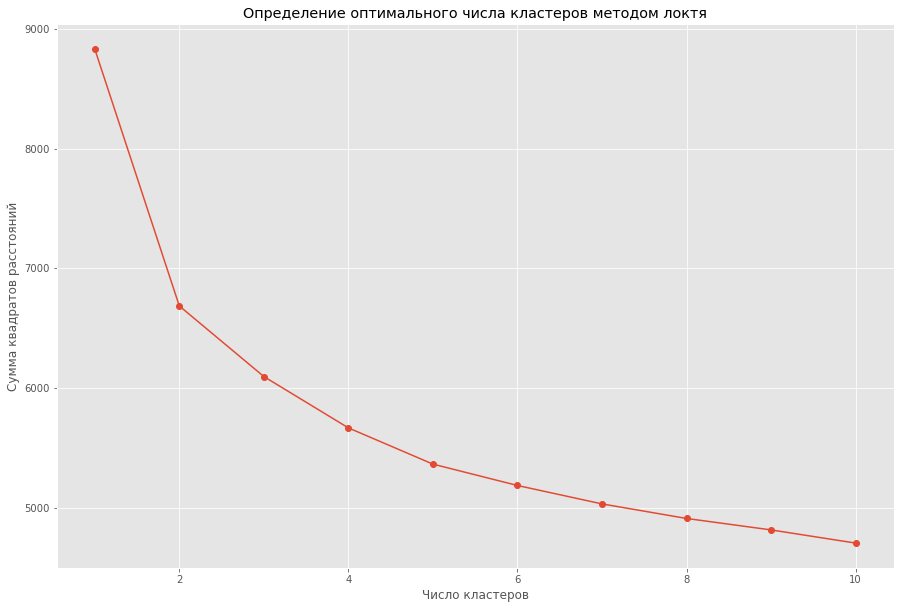

In [35]:
K = range(1, 11)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Определение оптимального числа кластеров методом локтя')
plt.show()

Определим оптимальное число кластеров: 4. После которого показатель суммы квадратов расстояний очень слабо уменьшается.

In [36]:
columns = list(standard_df.columns)

In [37]:
final_df = df.copy()

model = KMeans(n_clusters = 4, random_state = 111, n_init = 100, max_iter = 10000)
model.fit(standard_df)

final_df[f'4_clusters'] = model.labels_ +1

In [38]:
print('Численность 1 кластера: ', len(final_df[final_df['4_clusters'] ==1]))
print('Численность 2 кластера: ', len(final_df[final_df['4_clusters'] ==2]))
print('Численность 3 кластера: ', len(final_df[final_df['4_clusters'] ==3]))
print('Численность 4 кластера: ', len(final_df[final_df['4_clusters'] ==4]))

Численность 1 кластера:  90
Численность 2 кластера:  87
Численность 3 кластера:  73
Численность 4 кластера:  134


In [39]:
data = final_df.groupby(f'4_clusters')[columns].mean()
data.loc['total_mean'] = final_df.mean()
data

,Укажите свой возраст:,Укажите ваш семейный статус:,Укажите ваше место проживания:,Укажите уровень вашего среднемесячного дохода:,Для ежедневной носки я отдаю предпочтение:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Бренд нижнего белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Экологичность бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие базового белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие сексуального белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие и базового, и сексуального белья в одном бренде]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нескольких цветов одной модели]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Качество материалов]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие гендерно-нейтрального белья в ассортименте]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие индивидуального пошива белья]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие нестандартной размерной сетки]",Кружевное сексуальное белье должно стоить дороже базового:,"Чаще всего я покупаю белье, которое стоит:",Чаще всего я покупаю белье:,"Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Визуальная составляющая в социальных сетях бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие бодипозитивных кампаний у бренда]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Наличие программы лояльности]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Отношение лидеров мнений к бренду]","Оцените важность каждого фактора при выборе нижнего белья по шкале от 1 до 5, где 1 - совершенно не важно, 5 - критически важно: [Партнерство с брендами из других сфер]"
4_clusters,,,,,,,,,,,,,,,,,,,,,,,
1,2.022222,0.755556,3.988889,2.266667,1.744444,4.188889,4.277778,4.455556,4.433333,4.466667,4.488889,4.588889,3.800000,4.088889,4.044444,0.855556,1.666667,0.477778,4.277778,4.166667,4.355556,4.300000,4.166667
2,1.954023,0.770115,3.517241,2.022989,1.919540,1.390805,1.666667,1.770115,1.758621,1.609195,1.839080,2.528736,1.666667,1.758621,1.735632,0.839080,1.540230,0.482759,1.908046,1.551724,1.724138,1.586207,1.551724
3,1.342466,0.493151,4.671233,2.945205,1.684932,2.726027,1.493151,2.835616,3.095890,2.849315,3.424658,4.684932,1.136986,1.383562,1.246575,0.945205,1.794521,0.835616,3.684932,1.369863,2.041096,2.479452,1.767123
4,1.761194,0.634328,3.977612,1.925373,1.492537,2.589552,3.000000,3.776119,3.537313,3.552239,3.917910,4.425373,2.395522,2.574627,2.813433,0.686567,1.208955,0.567164,3.470149,3.126866,3.440299,2.850746,2.768657
total_mean,1.786458,0.666667,4.007812,2.221354,1.684896,2.718750,2.710938,3.302083,3.260417,3.192708,3.486979,4.083333,2.320312,2.518229,2.559896,0.809896,1.502604,0.578125,3.346354,2.679688,3.000000,2.833333,2.630208


А теперь посмотрим на средние характеристики каждой группы и опишем их особенности:

1 кластер :
1) Женщины с самым высоким средним возрастом
2) Больше находятся в отношениях или замужем
3) Среднемесячный доход чуть выше среднего
5) Им больше всех  важнее факторы: 
* Бренд нижнего белья
* Экологичность бренда
* Наличие базового белья
* Наличие сексуального белья
* Наличие и базового, и сексуального белья в одном бренде
* Наличие нескольких цветов одной модели
* Качество материалов
* Наличие гендерно-нейтрального белья в ассортименте
* Наличие индивидуального пошива белья
* Наличие нестандартной размерной сетки
5) Чаще покупапют белье, которое стоит дороже
6) Чаще покупают белье онлайн
7) И также им больше всех важнее факторы:
* Визуальная составляющая в социальных сетях бренда
* Наличие бодипозитивных кампаний у бренда
* Наличие программы лояльности
* Отношение лидеров мнений к бренду
* Партнерство с брендами из других сфер

2 кластер :
1) Женщины немного помладше, чем 1 кластер, но старше среднего
2) Больше находятся в отношениях или замужем
3) Проживают в  городах с меньшим населением
4) Среднемесячный доход ниже среднего
5) Они больше всех отдают предпочтение сексуальному белью при ежедневной носке
6) Им практически не важны факторы: 
* Бренд нижнего белья
* Экологичность бренда
* Наличие базового белья
* Наличие сексуального белья
* Наличие и базового, и сексуального белья в одном бренде
* Наличие нескольких цветов одной модели
* Качество материалов
* Наличие гендерно-нейтрального белья в ассортименте
* Наличие индивидуального пошива белья
* Наличие нестандартной размерной сетки
7) Чаще покупают белье онлайн
8) И также практически не важны факторы:
* Визуальная составляющая в социальных сетях бренда
* Наличие бодипозитивных кампаний у бренда
* Наличие программы лояльности
* Отношение лидеров мнений к бренду
* Партнерство с брендами из других сфер

3 кластер :
1) Самые молодые женщины
2) Меньше всех находятся в отношениях или замужем
3) Проживают чаще в Москве и МО
4) Среднемесячный доход самый высокий
5) Они больше всех отдают предпочтение сексуальному белью при ежедневной носке
6) Нейтрально  относятся к факторам: 
* Бренд нижнего белья
* Экологичность бренда
* Наличие базового белья
* Наличие сексуального белья
* Наличие и базового, и сексуального белья в одном бренде
* Наличие нескольких цветов одной модели


* Важно  Качество материалов

Меньше всего им важно:
* Наличие гендерно-нейтрального белья в ассортименте
* Наличие индивидуального пошива белья
* Наличие нестандартной размерной сетки
7) Покупают самое дорогое белье
8) Чаще покупают белье оффлайн
9) И также практически не важны факторы или относятся нейтрально:
* Наличие бодипозитивных кампаний у бренда
* Наличие программы лояльности
* Отношение лидеров мнений к бренду
* Партнерство с брендами из других сфер

Но важно:
* Визуальная составляющая бренда

4 кластер :
1) Средние женщины во возрасту, семейному статусу, месту проживания
2) Доход самый низкий из всех групп
3) Нейтрально  относятся к факторам: 
* Бренд нижнего белья
* Экологичность бренда
* Наличие базового белья
* Наличие сексуального белья
* Наличие и базового, и сексуального белья в одном бренде
* Наличие нескольких цветов одной модели
* Качество материалов
* Наличие гендерно-нейтрального белья в ассортименте
* Наличие индивидуального пошива белья
* Наличие нестандартной размерной сетки
4) Меньше всего готовы платить за белье
5) И  относятся нейтрально:
* Наличие бодипозитивных кампаний у бренда
* Наличие программы лояльности
* Отношение лидеров мнений к бренду
* Партнерство с брендами из других сфер
* Визуальная составляющая бренда